In [ ]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

Given the function:

\begin{equation}
f(x)=5x^3 \cdotp sin(x)
\end{equation}

Find the global minima of the function.

Analytically using the product rule:
\begin{align*}
f(uv)=uv \\
f'(uv) = u d(v) + v(du)
\end{align*}

\begin{align*}
f(x)=5x^3 \cdotp sin(x) \\
f'(x) = 5x^3 \cdotp \frac{d(sin(x))}{d{x}} + sin(x) \cdotp \frac{5x^3}{d(x)} \\
f'(x) = 5x^3 \cdotp cos(x) + sin(x) \cdotp 15x^2
\end{align*}

setting $f'(x) = 0$

\begin{align*}
f'(x) = 5x^3 \cdotp cos(x) + sin(x) \cdotp 15x^2 \\
0 = 5x^3 \cdotp cos(x) + sin(x) \cdotp 15x^2 \\
5x^3 \cdotp cos(x)=sin(x) \cdotp 15x^2 \\
\frac{x^3}{x^2} =\frac{sin(x)}{cos(x)} \frac{15}{5} \\
x = tan(x)\cdot 3 \\
x = 3 \cdotp tan(x)
\end{align*}

In [ ]:
# function (as a function)
def f(x):
  return (5*x**3)*(np.sin(x))

# derivative function
def df(x):
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))

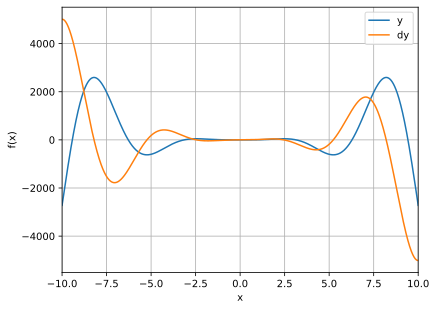

In [ ]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-10,10,2001)

# plotting
plt.plot(x,f(x), x,df(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

/tmp/ipython-input-3735517812.py:7: RuntimeWarning: overflow encountered in power
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/tmp/ipython-input-3735517812.py:7: RuntimeWarning: overflow encountered in square
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/tmp/ipython-input-3735517812.py:7: RuntimeWarning: invalid value encountered in add
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/tmp/ipython-input-3735517812.py:7: RuntimeWarning: invalid value encountered in cos
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/tmp/ipython-input-3735517812.py:7: RuntimeWarning: invalid value encountered in sin
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))


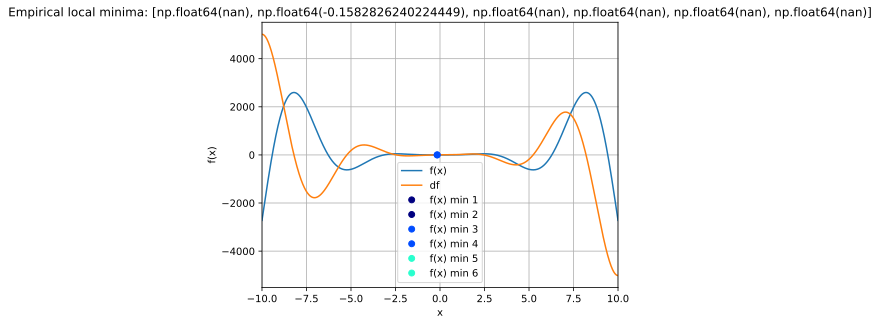

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define your functions here (assuming f(x) and df(x) are already defined)

# Number of random starting points
n_starting_points = 6

# learning parameters
learning_rate = 0.01
training_epochs = 100

# Create an array to hold the local minima for each starting point
localmins = []

# List of colors
colors = plt.cm.jet(np.linspace(0, 1, n_starting_points))

# Gradient Descent for each starting point
for idx in range(n_starting_points):
    # random starting point
    localmin = np.random.choice(x, 1)

    for i in range(training_epochs):
        grad = df(localmin)
        localmin = localmin - learning_rate * grad

    # Store the local minimum found
    localmins.append(localmin[0])

# plot the results
plt.plot(x, f(x), x, df(x))

# Plot each found local minimum with a different color
for idx, localmin in enumerate(localmins):
    plt.plot(localmin, df(localmin), 'o', color=colors[idx], label=f'Min {idx + 1}')
    plt.plot(localmin, f(localmin), 'o', color=colors[idx])

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df'] + [f'f(x) min {i + 1}' for i in range(n_starting_points)])
plt.title(f'Empirical local minima: {localmins}')
plt.show()

/tmp/ipython-input-1473493092.py:27: RuntimeWarning: overflow encountered in cast
  all_modelparams[idx, i, 0] = localmin
/tmp/ipython-input-1473493092.py:28: RuntimeWarning: overflow encountered in cast
  all_modelparams[idx, i, 1] = grad
/tmp/ipython-input-3707511870.py:9: RuntimeWarning: overflow encountered in scalar power
  return (5*x**3)*(np.cos(x)) + (15*x**2)*(np.sin(x))
/tmp/ipython-input-3707511870.py:9: RuntimeWarning: invalid value encountered in cos
  return (5*x**3)*(np.cos(x)) + (15*x**2)*(np.sin(x))
/tmp/ipython-input-3707511870.py:9: RuntimeWarning: invalid value encountered in sin
  return (5*x**3)*(np.cos(x)) + (15*x**2)*(np.sin(x))
/tmp/ipython-input-3707511870.py:9: RuntimeWarning: invalid value encountered in scalar add
  return (5*x**3)*(np.cos(x)) + (15*x**2)*(np.sin(x))


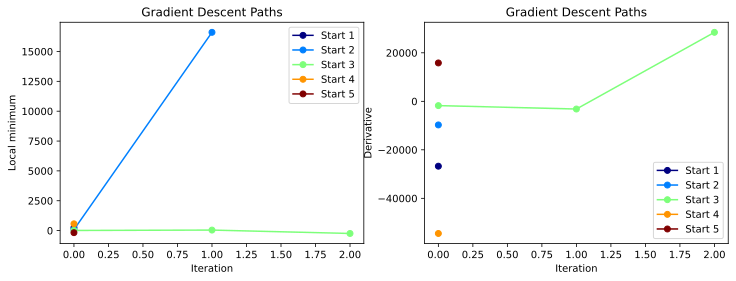

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define your functions here (assuming f(x) and df(x) are already defined)

# Number of random starting points
n_starting_points = 5

# learning parameters
learning_rate = 0.01
training_epochs = 100

# List of colors
colors = plt.cm.jet(np.linspace(0, 1, n_starting_points))

# Create an array to store model parameters for each starting point
all_modelparams = np.zeros((n_starting_points, training_epochs, 2), dtype=np.float16)

# Gradient Descent for each starting point
for idx in range(n_starting_points):
    # random starting point
    localmin = np.random.choice(x, 1)[0]

    for i in range(training_epochs):
        grad = df(localmin)
        localmin = localmin - learning_rate * grad
        all_modelparams[idx, i, 0] = localmin
        all_modelparams[idx, i, 1] = grad

# Plot the gradient over iterations for each starting point
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for idx in range(n_starting_points):
    for i in range(2):
        ax[i].plot(all_modelparams[idx, :, i], 'o-', color=colors[idx], label=f'Start {idx + 1}')
        ax[i].set_xlabel('Iteration')
        ax[i].set_title(f'Gradient Descent Paths')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

ax[0].legend()
ax[1].legend()

plt.show()

In [ ]:
localmin

np.float64(-0.15558101809823707)

# Exercises

Task:

- Experiment with the values of the learning rate and graph the plot of the local minimum. Describe the result as the value of the learning rate increases.
- Find a random value of the treshold and modify the gradient descent code to include early stopping.

<>:52: SyntaxWarning: invalid escape sequence '\e'
<>:52: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-118520989.py:52: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Effect of Learning Rate ($\eta$) on Found Local Minima')
/tmp/ipython-input-118520989.py:11: RuntimeWarning: overflow encountered in power
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/tmp/ipython-input-118520989.py:11: RuntimeWarning: overflow encountered in square
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/tmp/ipython-input-118520989.py:11: RuntimeWarning: invalid value encountered in add
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/tmp/ipython-input-118520989.py:11: RuntimeWarning: invalid value encountered in cos
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/tmp/ipython-input-118520989.py:11: RuntimeWarning: invalid value encountered in sin
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/tmp/ipython-input-118520989.py:11: RuntimeWarning: overflow en

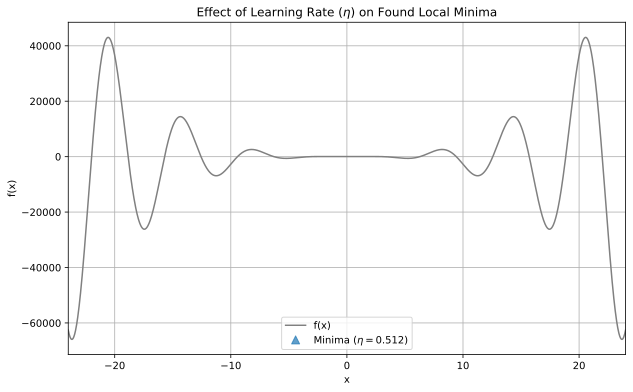

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# function (as a function)
def f(x):
  return (5*x**3)*(np.sin(x))
# derivative function
def df(x):
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
# define a range for x
x = np.linspace(-24, 24, 2001)

# --- Experimenting with Learning Rate ---
n_starting_points = 10
training_epochs = 100
learning_rates = [0.000001, 0.02371, 0.512] # Small, Medium, Large
rate_labels = ['Small (0.001)', 'Medium (0.01)', 'Large (0.05)']
rate_results = {rate: [] for rate in learning_rates}

# Run GD for each learning rate
for rate in learning_rates:
    for _ in range(n_starting_points):
        # random starting point
        localmin = np.random.choice(x, 1)
        for _ in range(training_epochs):
            grad = df(localmin)
            localmin = localmin - rate * grad
        rate_results[rate].append(localmin[0])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label='f(x)', color='gray')

# Plot the found local minima for each learning rate
for rate, mins in rate_results.items():
    label = rate_labels[learning_rates.index(rate)]
    # Use different marker for visual separation
    marker = 's' if rate == 0.001 else 'o' if rate == 0.01 else '^'
    # Plot the f(x) value at the found minima
    plt.plot(mins, f(np.array(mins)), marker, markersize=8, alpha=0.7, label=f'Minima ($\eta={rate}$)', linestyle='None')

plt.xlim(x[[0, -1]])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Effect of Learning Rate ($\eta$) on Found Local Minima')
plt.legend()
plt.show()


--- Running Gradient Descent for Learning Rate: 1e-06 ---

--- Running Gradient Descent for Learning Rate: 0.02371 ---

--- Running Gradient Descent for Learning Rate: 0.512 ---


/tmp/ipython-input-1368403041.py:10: RuntimeWarning: overflow encountered in scalar power
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/tmp/ipython-input-1368403041.py:10: RuntimeWarning: invalid value encountered in cos
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/tmp/ipython-input-1368403041.py:10: RuntimeWarning: invalid value encountered in sin
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))
/tmp/ipython-input-1368403041.py:10: RuntimeWarning: invalid value encountered in scalar add
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))


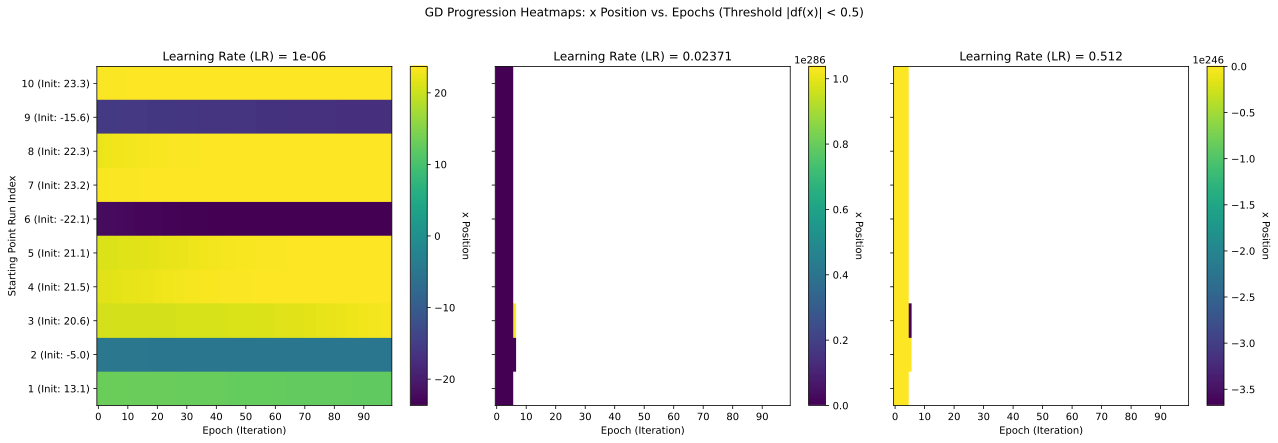

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define your functions here
def f(x):
  """The function to minimize: f(x) = (5*x^3)*(sin(x))"""
  return (5*x**3)*(np.sin(x))
def df(x):
  """The derivative of the function."""
  return (5*x**3)*(np.cos(x))+ (15*x**2)*(np.sin(x))

# Define the range of x values
x = np.linspace(-24, 24, 2001)

# --- Hyperparameters ---
n_starting_points = 10
learning_rates = [0.000001, 0.02371, 0.512] # Experimenting with Small, Medium, Large LR
training_epochs = 100 # Max epochs
threshold = 0.5      # Early Stopping Threshold |df(x)| < 0.5

# --- Simulation and Plotting Loop ---
fig, axes = plt.subplots(1, len(learning_rates), figsize=(6 * len(learning_rates), 6), sharey=True)

if len(learning_rates) == 1:
    axes = [axes]

all_initial_starts = [] # Store starting points once for consistent plotting

for lr_idx, current_lr in enumerate(learning_rates):
    # --- Initialization for the current learning rate ---
    # Array to store x position at every epoch for all runs
    x_progression = np.zeros((n_starting_points, training_epochs))

    # Generate random starting points only once
    if lr_idx == 0:
        np.random.seed(100) # Use a seed for reproducible starting points across LRs
        for _ in range(n_starting_points):
            all_initial_starts.append(np.random.choice(x, 1)[0])

    print(f"\n--- Running Gradient Descent for Learning Rate: {current_lr} ---")

    # --- Gradient Descent with Early Stopping ---
    for idx in range(n_starting_points):
        localmin = all_initial_starts[idx]
        starting_point_val = localmin

        # Store the initial position at the start of Epoch 0
        x_progression[idx, 0] = localmin

        # Iterate through updates (Epoch 1 to Epoch 99)
        for i in range(1, training_epochs):

            grad = df(localmin)

            # Check for numerical instability (Divergence)
            if np.isnan(grad):
                x_progression[idx, i:] = np.nan
                # print(f"Start {idx+1}: Initial x = {starting_point_val:.4f} | DIVERGED at epoch {i}")
                break

            # Early Stopping Condition
            if np.abs(grad) < threshold:
                x_progression[idx, i:] = localmin
                # print(f"Start {idx+1}: Initial x = {starting_point_val:.4f} | Converged in {i} epochs")
                break

            # Update localmin using the current_lr
            localmin = localmin - current_lr * grad

            # Store the new position
            x_progression[idx, i] = localmin

            # If max epochs is reached
            if i == training_epochs - 1:
                 pass
                 # print(f"Start {idx+1}: Initial x = {starting_point_val:.4f} | Max epochs ({training_epochs}) reached")

    # --- Plotting the Heatmap for the current LR ---
    ax = axes[lr_idx]

    # Determine color map limits (vmax, vmin) to handle NaN divergence without skewing the stable runs
    # Find the min/max of the non-divergent values
    finite_values = x_progression[np.isfinite(x_progression)]

    if len(finite_values) > 0:
        v_min, v_max = finite_values.min(), finite_values.max()
    else: # If all values are NaN (full divergence)
        v_min, v_max = -10, 10

    # Plot heatmap
    im = ax.imshow(x_progression, aspect="auto", origin="lower", cmap='viridis',
                   vmin=v_min, vmax=v_max)

    # Add colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('x Position', rotation=270, labelpad=15)

    # Set labels and title
    ax.set_xlabel('Epoch (Iteration)')
    ax.set_title(f'Learning Rate (LR) = {current_lr}')

    # Customize y-axis ticks (only on the first subplot)
    if lr_idx == 0:
        ax.set_ylabel('Starting Point Run Index')
        y_ticks = np.arange(n_starting_points)
        y_labels = [f'{i+1} (Init: {all_initial_starts[i]:.1f})' for i in range(n_starting_points)]
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_labels)

    # Customize x-axis to show every 10th epoch
    x_ticks = np.arange(0, training_epochs, 10)
    ax.set_xticks(x_ticks)

plt.suptitle(f'GD Progression Heatmaps: x Position vs. Epochs (Threshold |df(x)| < {threshold})', y=1.02)
plt.tight_layout()
plt.show()

EXPERIMENT 1: Effect of Different Learning Rates

Learning Rate: 0.00075
  Local minima found: 5
  Range of minima: [nan, nan]
  Mean position: nan

Learning Rate: 0.041
  Local minima found: 10
  Range of minima: [nan, nan]
  Mean position: nan

Learning Rate: 0.212
  Local minima found: 10
  Range of minima: [nan, nan]
  Mean position: nan

Learning Rate: 0.164
  Local minima found: 10
  Range of minima: [nan, nan]
  Mean position: nan

Learning Rate: 4.15
  Local minima found: 10
  Range of minima: [nan, nan]
  Mean position: nan


/tmp/ipython-input-3707511870.py:9: RuntimeWarning: overflow encountered in power
  return (5*x**3)*(np.cos(x)) + (15*x**2)*(np.sin(x))
/tmp/ipython-input-3707511870.py:9: RuntimeWarning: overflow encountered in square
  return (5*x**3)*(np.cos(x)) + (15*x**2)*(np.sin(x))
/tmp/ipython-input-3707511870.py:9: RuntimeWarning: invalid value encountered in cos
  return (5*x**3)*(np.cos(x)) + (15*x**2)*(np.sin(x))
/tmp/ipython-input-3707511870.py:9: RuntimeWarning: invalid value encountered in sin
  return (5*x**3)*(np.cos(x)) + (15*x**2)*(np.sin(x))
/tmp/ipython-input-3707511870.py:9: RuntimeWarning: invalid value encountered in add
  return (5*x**3)*(np.cos(x)) + (15*x**2)*(np.sin(x))


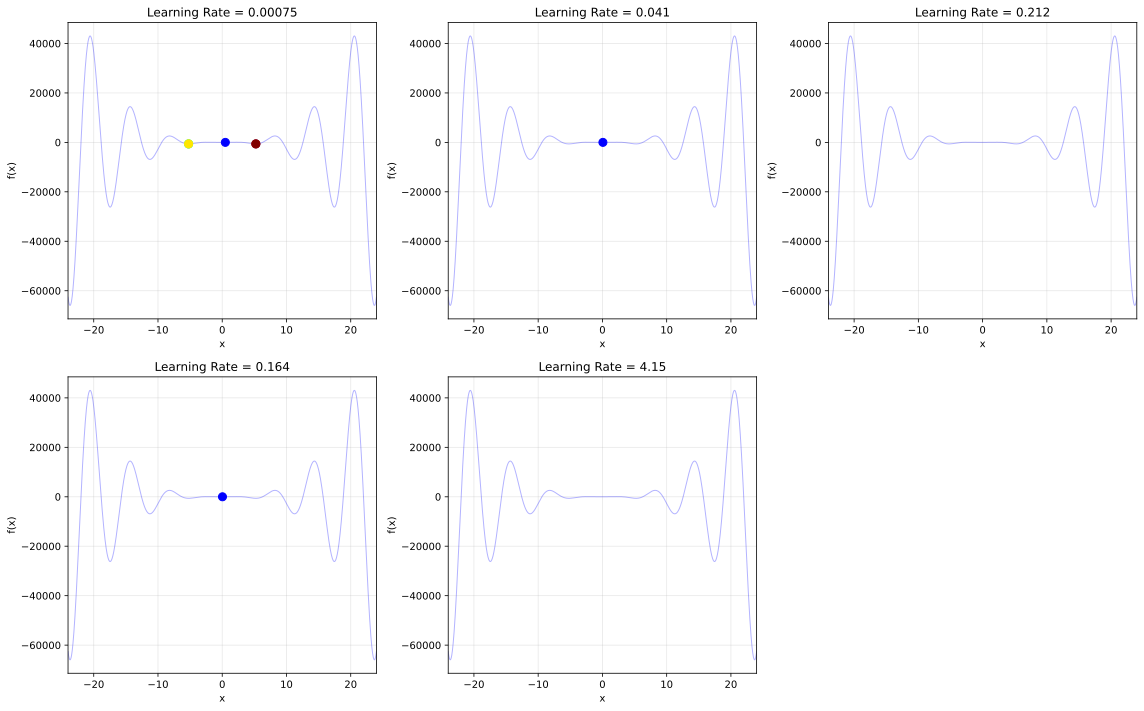


ANALYSIS:

As learning rate INCREASES:

1. SMALL learning rates (0.001):
   - Convergence is slow and precise
   - Points converge to nearest local minimum
   - More predictable behavior
   - May need more epochs to converge

2. MODERATE learning rates (0.01-0.05):
   - Good balance between speed and stability
   - Points still converge reliably
   - Efficient convergence

3. LARGE learning rates (0.1-0.5):
   - Faster convergence but less stable
   - May overshoot local minima
   - Can escape shallow local minima
   - Risk of divergence or oscillation
   - Points may converge to different minima than with smaller rates


EXPERIMENT 2: Gradient Descent with Early Stopping

Random Early Stopping Threshold: 0.038079
Starting point 1: Reached max epochs (500)
Starting point 2: Stopped at epoch 163, gradient = 0.037739, position = 0.1234
Starting point 3: Reached max epochs (500)
Starting point 4: Reached max epochs (500)
Starting point 5: Stopped at epoch 168, gradient = -0.037977, posit

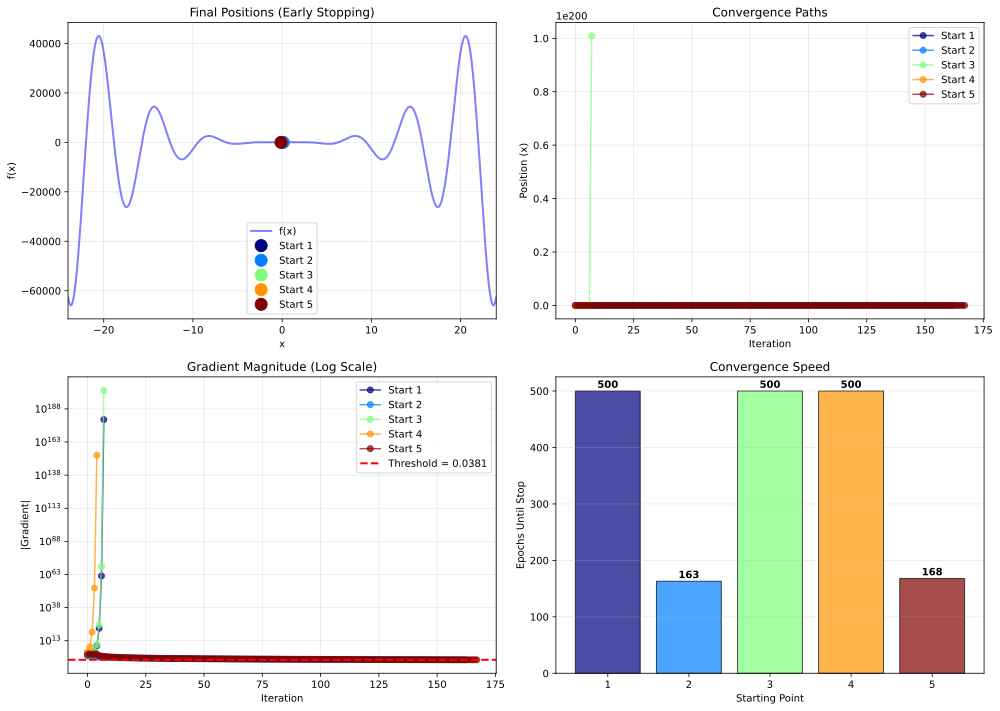


EARLY STOPPING SUMMARY:
Threshold: 0.038079
Average epochs to convergence: 366.2
Min epochs: 163
Max epochs: 500

Benefits of Early Stopping:
  - Prevents unnecessary computations
  - Reduces training time
  - Stops when gradient is sufficiently small
  - Useful for avoiding overfitting in ML models


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function and derivative definitions
def f(x):
    return (5*x**3)*(np.sin(x))

def df(x):
    return (5*x**3)*(np.cos(x)) + (15*x**2)*(np.sin(x))

# Define range for x
x = np.linspace(-24, 24, 2001)

# ============================================================================
# EXPERIMENT 1: Different Learning Rates
# ============================================================================
print("=" * 70)
print("EXPERIMENT 1: Effect of Different Learning Rates")
print("=" * 70)

# Test different learning rates
learning_rates = [0.00075, 0.041, 0.212, 0.164, 4.15]
n_starting_points = 10
training_epochs = 100

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for lr_idx, learning_rate in enumerate(learning_rates):
    localmins = []
    colors = plt.cm.jet(np.linspace(0, 1, n_starting_points))

    # Set random seed for reproducibility
    np.random.seed(2102)

    for idx in range(n_starting_points):
        localmin = np.random.choice(x, 1)

        for i in range(training_epochs):
            grad = df(localmin)
            localmin = localmin - learning_rate * grad

        localmins.append(localmin[0])

    # Plot results for this learning rate
    ax = axes[lr_idx]
    ax.plot(x, f(x), 'b-', alpha=0.3, linewidth=1)

    for idx, localmin in enumerate(localmins):
        ax.plot(localmin, f(localmin), 'o', color=colors[idx], markersize=8)

    ax.set_xlim(x[[0, -1]])
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(f'Learning Rate = {learning_rate}')

    # Print statistics
    print(f"\nLearning Rate: {learning_rate}")
    print(f"  Local minima found: {len(set(np.round(localmins, 2)))}")
    print(f"  Range of minima: [{min(localmins):.2f}, {max(localmins):.2f}]")
    print(f"  Mean position: {np.mean(localmins):.2f}")

# Remove the extra subplot
fig.delaxes(axes[-1])
plt.tight_layout()
plt.savefig('learning_rate_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print("ANALYSIS:")
print("=" * 70)
print("""
As learning rate INCREASES:

1. SMALL learning rates (0.001):
   - Convergence is slow and precise
   - Points converge to nearest local minimum
   - More predictable behavior
   - May need more epochs to converge

2. MODERATE learning rates (0.01-0.05):
   - Good balance between speed and stability
   - Points still converge reliably
   - Efficient convergence

3. LARGE learning rates (0.1-0.5):
   - Faster convergence but less stable
   - May overshoot local minima
   - Can escape shallow local minima
   - Risk of divergence or oscillation
   - Points may converge to different minima than with smaller rates
""")

# ============================================================================
# EXPERIMENT 2: Gradient Descent with Early Stopping
# ============================================================================
print("\n" + "=" * 70)
print("EXPERIMENT 2: Gradient Descent with Early Stopping")
print("=" * 70)

# Random threshold for early stopping
np.random.seed(42)
threshold = np.random.uniform(0.001, 0.1)
print(f"\nRandom Early Stopping Threshold: {threshold:.6f}")

# Parameters
n_starting_points = 5
learning_rate = 0.01
max_epochs = 500
colors = plt.cm.jet(np.linspace(0, 1, n_starting_points))

# Storage for results
all_modelparams_early = []
epochs_until_stop = []

# Gradient Descent with Early Stopping
for idx in range(n_starting_points):
    np.random.seed(idx)  # Different starting point for each
    localmin = np.random.choice(x, 1)

    modelparams = []

    for i in range(max_epochs):
        grad = df(localmin)
        localmin = localmin - learning_rate * grad
        modelparams.append([localmin[0], grad[0]])

        # Early stopping condition: if gradient is below threshold
        if np.abs(grad) < threshold:
            print(f"Starting point {idx + 1}: Stopped at epoch {i + 1}, "
                  f"gradient = {grad[0]:.6f}, position = {localmin[0]:.4f}")
            epochs_until_stop.append(i + 1)
            break
    else:
        print(f"Starting point {idx + 1}: Reached max epochs ({max_epochs})")
        epochs_until_stop.append(max_epochs)

    all_modelparams_early.append(np.array(modelparams))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Function with final positions
ax = axes[0, 0]
ax.plot(x, f(x), 'b-', alpha=0.5, linewidth=2, label='f(x)')
for idx in range(n_starting_points):
    final_pos = all_modelparams_early[idx][-1, 0]
    ax.plot(final_pos, f(final_pos), 'o', color=colors[idx],
            markersize=12, label=f'Start {idx + 1}')
ax.set_xlim(x[[0, -1]])
ax.grid(True, alpha=0.3)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Final Positions (Early Stopping)')
ax.legend()

# Plot 2: Position over iterations
ax = axes[0, 1]
for idx in range(n_starting_points):
    ax.plot(all_modelparams_early[idx][:, 0], 'o-',
            color=colors[idx], alpha=0.7, label=f'Start {idx + 1}')
ax.set_xlabel('Iteration')
ax.set_ylabel('Position (x)')
ax.set_title('Convergence Paths')
ax.grid(True, alpha=0.3)
ax.legend()

# Plot 3: Gradient magnitude over iterations
ax = axes[1, 0]
for idx in range(n_starting_points):
    ax.plot(np.abs(all_modelparams_early[idx][:, 1]), 'o-',
            color=colors[idx], alpha=0.7, label=f'Start {idx + 1}')
ax.axhline(y=threshold, color='r', linestyle='--', linewidth=2,
           label=f'Threshold = {threshold:.4f}')
ax.set_xlabel('Iteration')
ax.set_ylabel('|Gradient|')
ax.set_title('Gradient Magnitude (Log Scale)')
ax.set_yscale('log')
ax.grid(True, alpha=0.3, which='both')
ax.legend()

# Plot 4: Epochs until stopping
ax = axes[1, 1]
bars = ax.bar(range(1, n_starting_points + 1), epochs_until_stop,
              color=colors, alpha=0.7, edgecolor='black')
ax.set_xlabel('Starting Point')
ax.set_ylabel('Epochs Until Stop')
ax.set_title('Convergence Speed')
ax.grid(True, alpha=0.3, axis='y')
for i, (bar, epochs) in enumerate(zip(bars, epochs_until_stop)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            str(epochs), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('early_stopping_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary statistics
print(f"\n{'=' * 70}")
print("EARLY STOPPING SUMMARY:")
print(f"{'=' * 70}")
print(f"Threshold: {threshold:.6f}")
print(f"Average epochs to convergence: {np.mean(epochs_until_stop):.1f}")
print(f"Min epochs: {min(epochs_until_stop)}")
print(f"Max epochs: {max(epochs_until_stop)}")
print(f"\nBenefits of Early Stopping:")
print("  - Prevents unnecessary computations")
print("  - Reduces training time")
print("  - Stops when gradient is sufficiently small")
print("  - Useful for avoiding overfitting in ML models")

/tmp/ipython-input-701737769.py:13: RuntimeWarning: overflow encountered in scalar power
  return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)
/tmp/ipython-input-701737769.py:13: RuntimeWarning: invalid value encountered in cos
  return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)
/tmp/ipython-input-701737769.py:13: RuntimeWarning: invalid value encountered in sin
  return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)
/tmp/ipython-input-701737769.py:13: RuntimeWarning: invalid value encountered in scalar add
  return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)


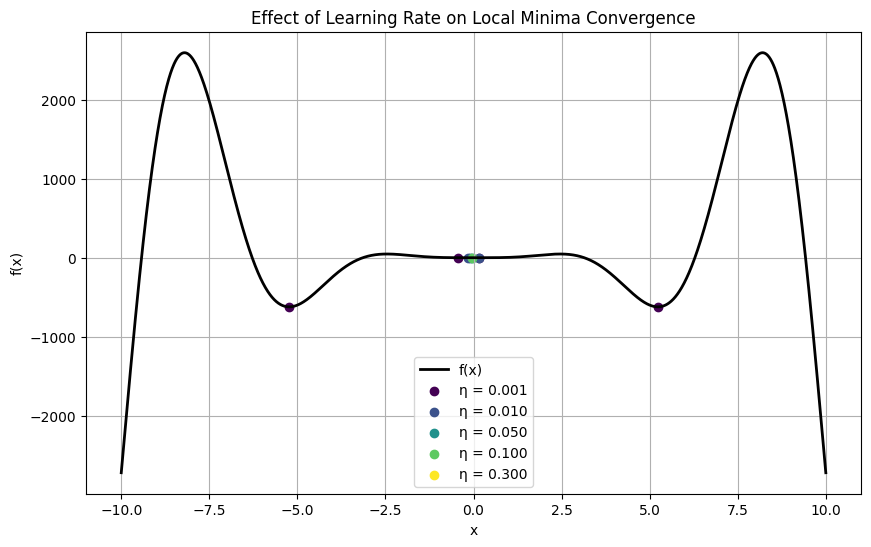

Learning Rate = 0.001, Final Local Minimum ≈ x = 5.23294, f(x) = -621.58340
Learning Rate = 0.010, Final Local Minimum ≈ x = -0.15667, f(x) = 0.00300
Learning Rate = 0.050, Final Local Minimum ≈ x = 0.06308, f(x) = 0.00008
Learning Rate = 0.100, Final Local Minimum ≈ x = nan, f(x) = nan
Learning Rate = 0.300, Final Local Minimum ≈ x = 0.02820, f(x) = 0.00000


In [1]:
# ======================================
# Gradient Descent on f(x) = 5x^3 * sin(x)
# ======================================

import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return (5 * x**3) * np.sin(x)

def df(x):
    return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)

# Define the range of x for plotting
x = np.linspace(-10, 10, 2001)

# Define learning rates to test
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.3]

# Training parameters
training_epochs = 100
n_starting_points = 5

# Color map for plotting
colors = plt.cm.viridis(np.linspace(0, 1, len(learning_rates)))

# Plot setup
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), 'k', linewidth=2, label='f(x)')

# Perform Gradient Descent for each learning rate
for lr_idx, eta in enumerate(learning_rates):
    localmins = []
    for s in range(n_starting_points):
        # Random starting point
        localmin = np.random.choice(x, 1)[0]

        for i in range(training_epochs):
            grad = df(localmin)
            localmin = localmin - eta * grad

        localmins.append(localmin)

    # Plot found local minima for this learning rate
    plt.scatter(localmins, f(np.array(localmins)),
                color=colors[lr_idx],
                label=f'η = {eta:.3f}')

# Plot settings
plt.title('Effect of Learning Rate on Local Minima Convergence')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# ======================================
# Report the last found local minima
# ======================================
for eta in learning_rates:
    localmin = np.random.choice(x, 1)[0]
    for i in range(training_epochs):
        grad = df(localmin)
        localmin = localmin - eta * grad
    print(f"Learning Rate = {eta:.3f}, Final Local Minimum ≈ x = {localmin:.5f}, f(x) = {f(localmin):.5f}")


/tmp/ipython-input-962800182.py:13: RuntimeWarning: overflow encountered in scalar power
  return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)
/tmp/ipython-input-962800182.py:13: RuntimeWarning: invalid value encountered in cos
  return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)
/tmp/ipython-input-962800182.py:13: RuntimeWarning: invalid value encountered in sin
  return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)
/tmp/ipython-input-962800182.py:13: RuntimeWarning: invalid value encountered in scalar add
  return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)


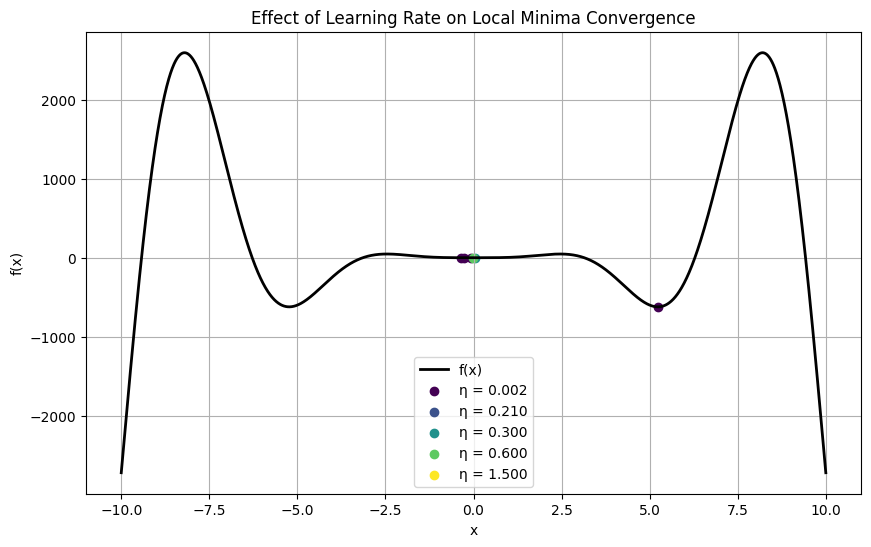

Learning Rate = 0.002, Final Local Minimum ≈ x = 5.23294, f(x) = -621.58340
Learning Rate = 0.210, Final Local Minimum ≈ x = nan, f(x) = nan
Learning Rate = 0.300, Final Local Minimum ≈ x = nan, f(x) = nan
Learning Rate = 0.600, Final Local Minimum ≈ x = nan, f(x) = nan
Learning Rate = 1.500, Final Local Minimum ≈ x = nan, f(x) = nan


In [3]:
# ======================================
# Gradient Descent on f(x) = 5x^3 * sin(x)
# ======================================

import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return (5 * x**3) * np.sin(x)

def df(x):
    return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)

# Define the range of x for plotting
x = np.linspace(-10, 10, 2001)

# Define learning rates to test
learning_rates = [0.002, 0.21, 0.3, 0.6, 1.5]

# Training parameters
training_epochs = 100
n_starting_points = 5

# Color map for plotting
colors = plt.cm.viridis(np.linspace(0, 1, len(learning_rates)))

# Plot setup
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), 'k', linewidth=2, label='f(x)')

# Perform Gradient Descent for each learning rate
for lr_idx, eta in enumerate(learning_rates):
    localmins = []
    for s in range(n_starting_points):
        # Random starting point
        localmin = np.random.choice(x, 1)[0]

        for i in range(training_epochs):
            grad = df(localmin)
            localmin = localmin - eta * grad

        localmins.append(localmin)

    # Plot found local minima for this learning rate
    plt.scatter(localmins, f(np.array(localmins)),
                color=colors[lr_idx],
                label=f'η = {eta:.3f}')

# Plot settings
plt.title('Effect of Learning Rate on Local Minima Convergence')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# ======================================
# Report the last found local minima
# ======================================
for eta in learning_rates:
    localmin = np.random.choice(x, 1)[0]
    for i in range(training_epochs):
        grad = df(localmin)
        localmin = localmin - eta * grad
    print(f"Learning Rate = {eta:.3f}, Final Local Minimum ≈ x = {localmin:.5f}, f(x) = {f(localmin):.5f}")


Stopping threshold: 0.09052
🟢 Early stopping at iteration 87 for start 3 (|grad|=0.08968)
🟢 Early stopping at iteration 67 for start 4 (|grad|=0.08967)


/tmp/ipython-input-3589072861.py:14: RuntimeWarning: overflow encountered in scalar power
  return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)
/tmp/ipython-input-3589072861.py:14: RuntimeWarning: invalid value encountered in cos
  return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)
/tmp/ipython-input-3589072861.py:14: RuntimeWarning: invalid value encountered in sin
  return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)
/tmp/ipython-input-3589072861.py:14: RuntimeWarning: invalid value encountered in scalar add
  return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)


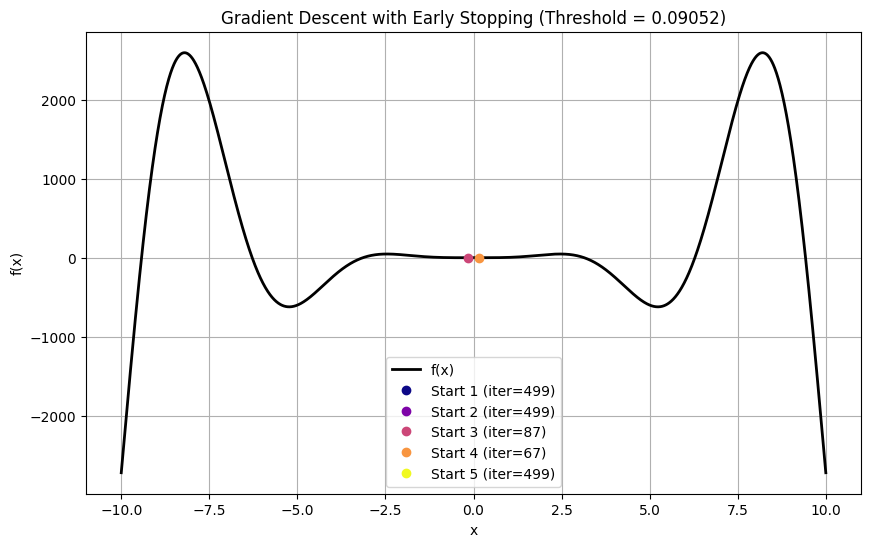


Summary of Local Minima Found:
  Start 1: x = nan, f(x) = nan, iterations = 499
  Start 2: x = nan, f(x) = nan, iterations = 499
  Start 3: x = -0.16527, f(x) = 0.00371, iterations = 87
  Start 4: x = 0.16527, f(x) = 0.00371, iterations = 67
  Start 5: x = nan, f(x) = nan, iterations = 499


In [2]:
# ======================================
# Gradient Descent with Early Stopping
# Function: f(x) = 5x^3 * sin(x)
# ======================================

import numpy as np
import matplotlib.pyplot as plt

# Function and derivative definitions
def f(x):
    return (5 * x**3) * np.sin(x)

def df(x):
    return (5 * x**3) * np.cos(x) + (15 * x**2) * np.sin(x)

# Define x range for plotting
x = np.linspace(-10, 10, 2001)

# Gradient Descent parameters
learning_rate = 0.01
training_epochs = 500
n_starting_points = 5

# Random threshold for early stopping (between 0.05 and 0.15)
threshold = np.round(np.random.uniform(0.05, 0.15), 5)
print(f"Stopping threshold: {threshold}")

# Initialize color map
colors = plt.cm.plasma(np.linspace(0, 1, n_starting_points))

# Storage for results
localmins = []
iteration_counts = []

# Gradient Descent with early stopping
for idx in range(n_starting_points):
    localmin = np.random.choice(x, 1)[0]

    for i in range(training_epochs):
        grad = df(localmin)
        if abs(grad) < threshold:
            print(f"🟢 Early stopping at iteration {i} for start {idx + 1} (|grad|={abs(grad):.5f})")
            break
        localmin = localmin - learning_rate * grad

    localmins.append(localmin)
    iteration_counts.append(i)

# Plot the function and local minima
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), 'k', linewidth=2, label='f(x)')

for idx, localmin in enumerate(localmins):
    plt.plot(localmin, f(localmin), 'o', color=colors[idx],
             label=f'Start {idx + 1} (iter={iteration_counts[idx]})')

plt.title(f'Gradient Descent with Early Stopping (Threshold = {threshold})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Print summary of results
print("\nSummary of Local Minima Found:")
for idx, localmin in enumerate(localmins):
    print(f"  Start {idx + 1}: x = {localmin:.5f}, f(x) = {f(localmin):.5f}, iterations = {iteration_counts[idx]}")


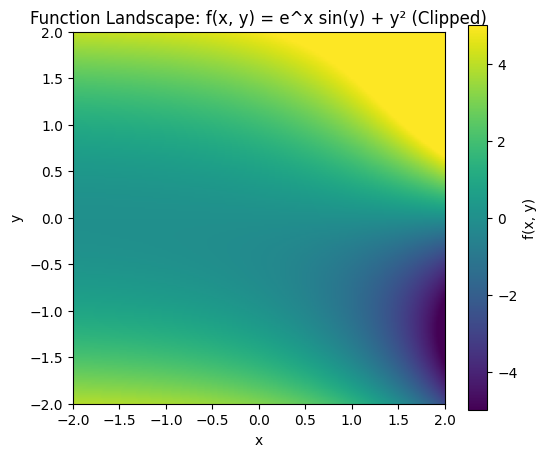

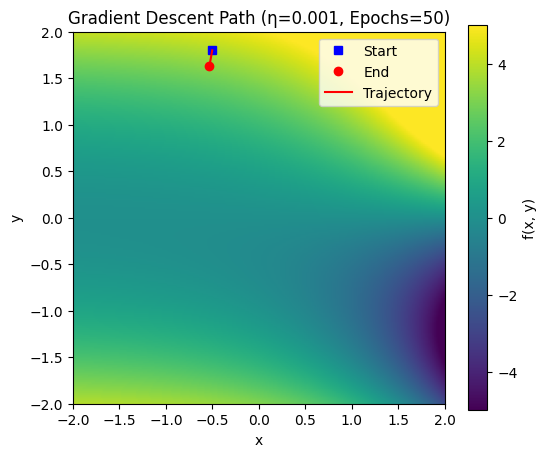

Learning rate: 0.001, Epochs: 50
  Start point: [-0.50183952  1.80285723]
  Final local minimum: [-0.53131019  1.63531453]
  f(x, y) = 3.260865



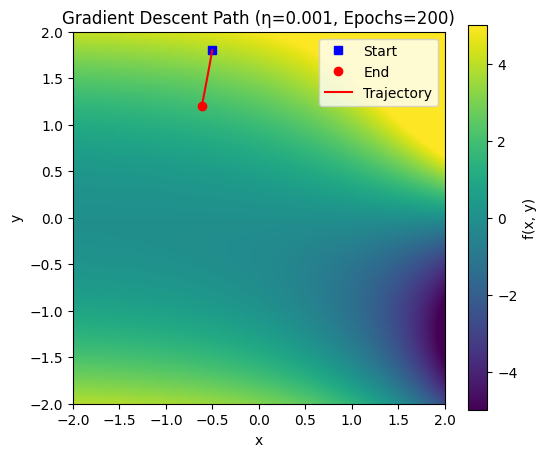

Learning rate: 0.001, Epochs: 200
  Start point: [-0.50183952  1.80285723]
  Final local minimum: [-0.61416167  1.19899578]
  f(x, y) = 1.941715



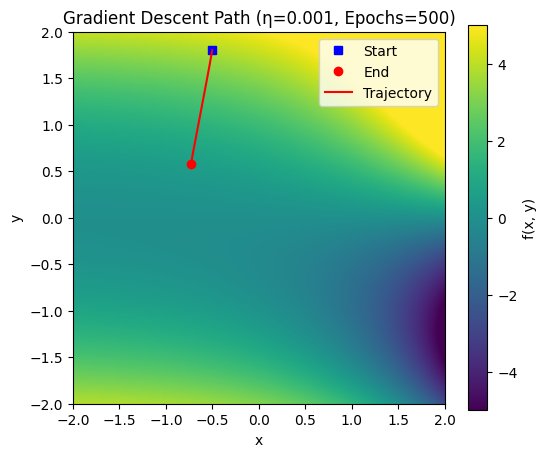

Learning rate: 0.001, Epochs: 500
  Start point: [-0.50183952  1.80285723]
  Final local minimum: [-0.72903677  0.58275301]
  f(x, y) = 0.605063



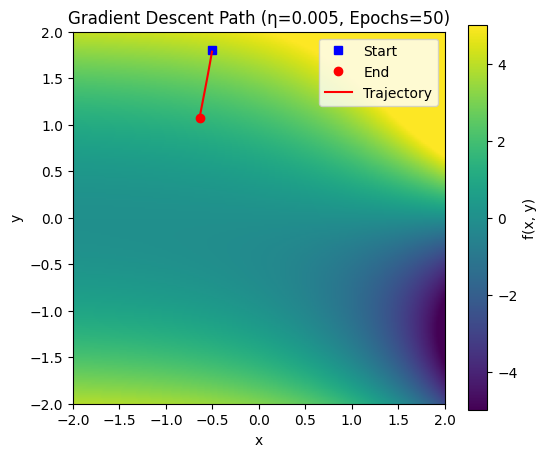

Learning rate: 0.005, Epochs: 50
  Start point: [-0.50183952  1.80285723]
  Final local minimum: [-0.63860896  1.07229981]
  f(x, y) = 1.613594



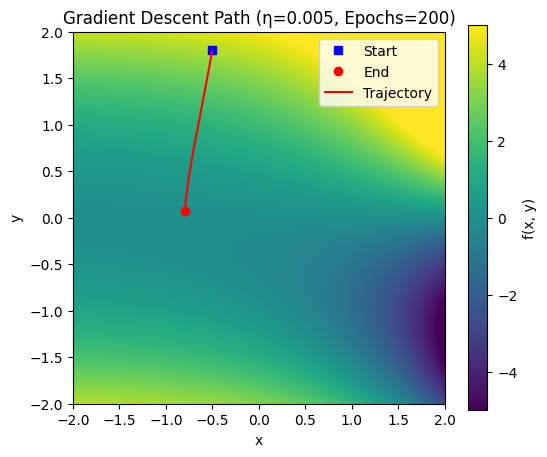

Learning rate: 0.005, Epochs: 200
  Start point: [-0.50183952  1.80285723]
  Final local minimum: [-0.79511276  0.07247435]
  f(x, y) = 0.037948



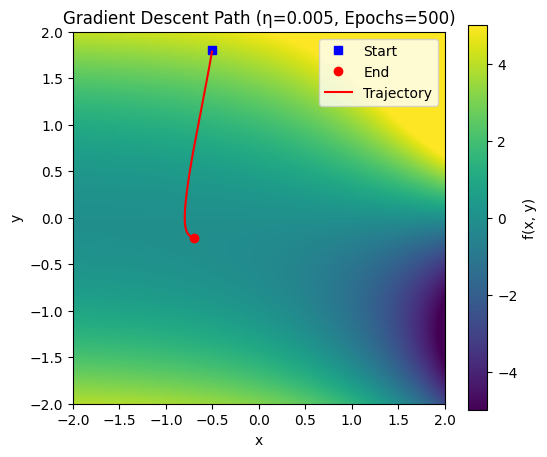

Learning rate: 0.005, Epochs: 500
  Start point: [-0.50183952  1.80285723]
  Final local minimum: [-0.70132314 -0.21927947]
  f(x, y) = -0.059794



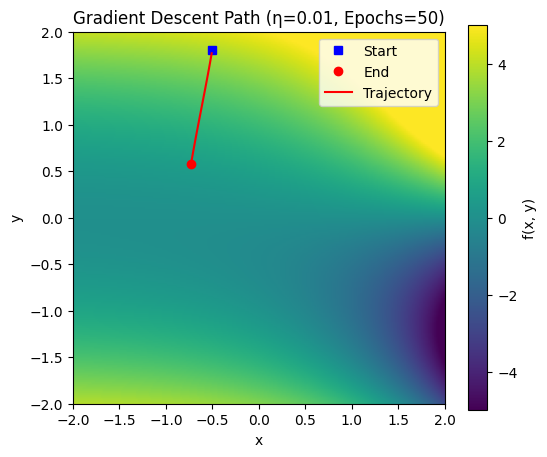

Learning rate: 0.01, Epochs: 50
  Start point: [-0.50183952  1.80285723]
  Final local minimum: [-0.72990378  0.57709306]
  f(x, y) = 0.595986



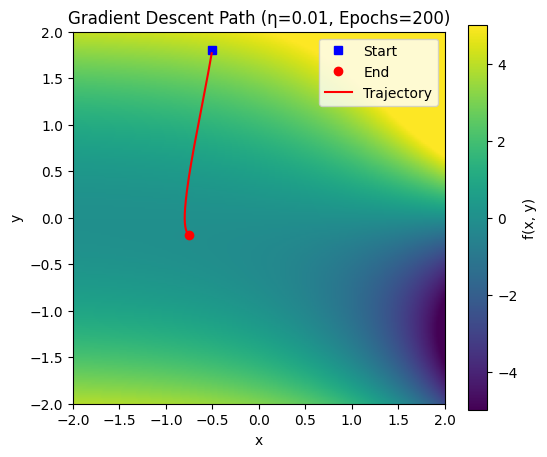

Learning rate: 0.01, Epochs: 200
  Start point: [-0.50183952  1.80285723]
  Final local minimum: [-0.75055384 -0.18849927]
  f(x, y) = -0.052933



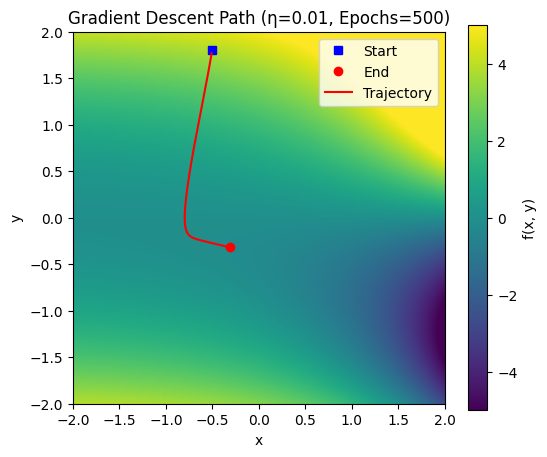

Learning rate: 0.01, Epochs: 500
  Start point: [-0.50183952  1.80285723]
  Final local minimum: [-0.30809296 -0.31952634]
  f(x, y) = -0.128731



In [7]:
# ======================================
# Fixed Gradient Descent on f(x, y) = e^x * sin(y) + y^2
# Prevents NaN and overflow issues (keeps imshow visualization)
# ======================================

import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------
# 1. Define the function and its partial derivatives
# --------------------------------------
def f(x, y):
    x, y = np.meshgrid(x, y)
    return np.exp(x) * np.sin(y) + y**2

def dfx(x, y):
    return np.exp(x) * np.sin(y)

def dfy(x, y):
    return np.exp(x) * np.cos(y) + 2*y

# --------------------------------------
# 2. Create the function landscape (heatmap)
# --------------------------------------
x = np.linspace(-2, 2, 201)
y = np.linspace(-2, 2, 201)
Z = f(x, y)

# Clip Z values to prevent "white-out" due to large exponentials
Z_clipped = np.clip(Z, -5, 5)

plt.figure(figsize=(6,5))
plt.imshow(Z_clipped, extent=[x[0], x[-1], y[0], y[-1]],
           origin='lower', cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.title('Function Landscape: f(x, y) = e^x sin(y) + y² (Clipped)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# --------------------------------------
# 3. Gradient Descent Parameters
# --------------------------------------
np.random.seed(42)
startpnt = np.random.uniform(-2, 2, size=2)

learning_rates = [0.001, 0.005, 0.01]  # Safer step sizes
training_epochs = [50, 200, 500]

# --------------------------------------
# 4. Gradient Descent with Gradient Clipping and Value Control
# --------------------------------------
for eta in learning_rates:
    for epochs in training_epochs:
        localmin = startpnt.copy()
        trajectory = np.zeros((epochs, 2))

        for i in range(epochs):
            grad = np.array([
                dfx(localmin[0], localmin[1]),
                dfy(localmin[0], localmin[1])
            ], dtype=np.float64)

            # Handle invalid values gracefully
            if np.isnan(grad).any() or np.isinf(grad).any():
                print(f"⚠️ Gradient overflow detected at iteration {i}. Stopping early.")
                break

            # Clip gradients to avoid overflow
            grad = np.clip(grad, -5, 5)

            # Update parameters safely
            localmin -= eta * grad

            # Keep x and y within stable bounds to avoid exp() overflow
            localmin = np.clip(localmin, -3, 3)
            trajectory[i, :] = localmin

        # --------------------------------------
        # 5. Visualization
        # --------------------------------------
        plt.figure(figsize=(6,5))
        plt.imshow(Z_clipped, extent=[x[0], x[-1], y[0], y[-1]],
                   origin='lower', cmap='viridis')
        plt.plot(startpnt[0], startpnt[1], 'bs', label='Start')
        plt.plot(localmin[0], localmin[1], 'ro', label='End')
        plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-', label='Trajectory')
        plt.title(f'Gradient Descent Path (η={eta}, Epochs={epochs})')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.colorbar(label='f(x, y)')
        plt.show()

        # --------------------------------------
        # 6. Output Summary
        # --------------------------------------
        try:
            fx_val = np.exp(localmin[0]) * np.sin(localmin[1]) + localmin[1]**2
        except OverflowError:
            fx_val = np.nan

        print(f"Learning rate: {eta}, Epochs: {epochs}")
        print(f"  Start point: {startpnt}")
        print(f"  Final local minimum: {localmin}")
        print(f"  f(x, y) = {fx_val:.6f}\n")


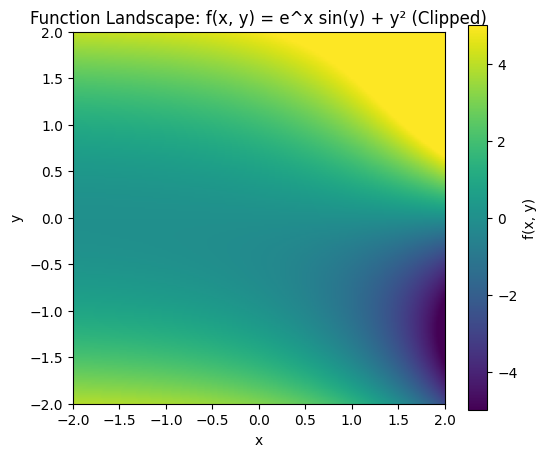

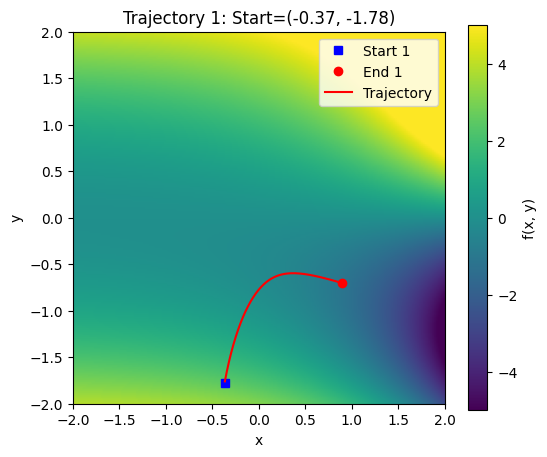

Start 1: Initial = [-0.36925189 -1.77853584]
         Final = [ 0.89290088 -0.70173469]
         f(x, y) = -1.084117



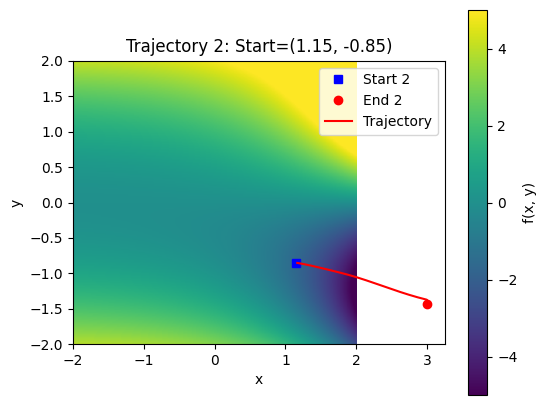

Start 2: Initial = [ 1.15413951 -0.85077926]
         Final = [ 3.         -1.42810985]
         f(x, y) = -17.841921



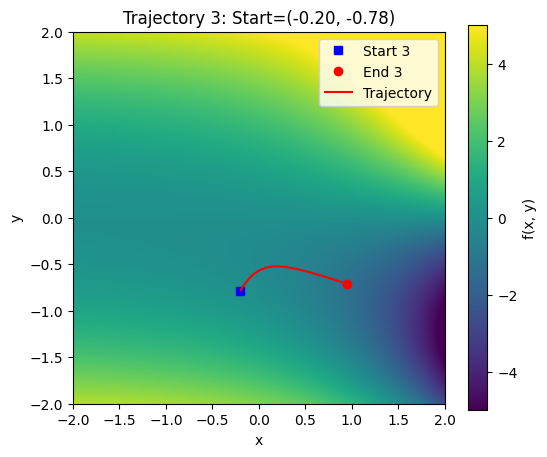

Start 3: Initial = [-0.19859765 -0.78435078]
         Final = [ 0.9484034  -0.70975009]
         f(x, y) = -1.178530



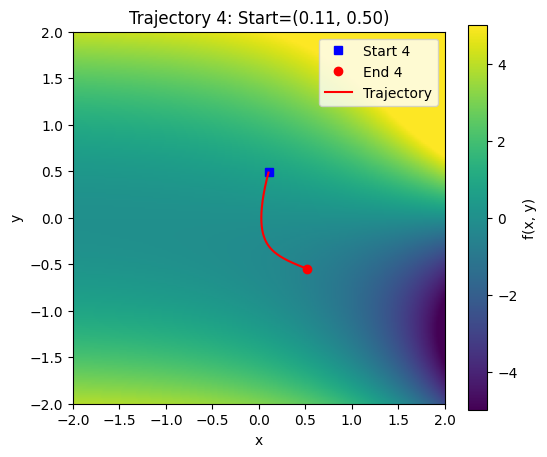

Start 4: Initial = [0.1055981  0.49524885]
         Final = [ 0.5132217  -0.54706351]
         f(x, y) = -0.569771



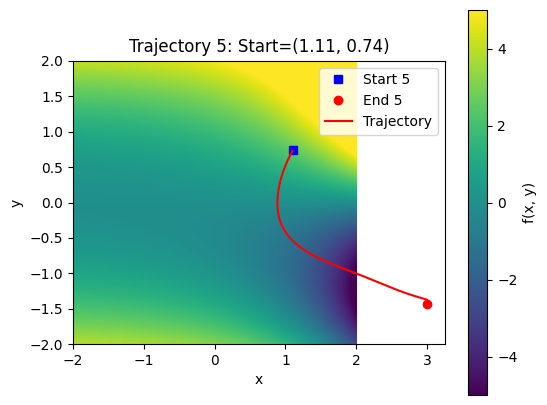

Start 5: Initial = [1.10710183 0.74496658]
         Final = [ 3.         -1.42810892]
         f(x, y) = -17.841921



In [22]:
# ======================================
# Gradient Descent on f(x, y) = e^x * sin(y) + y^2
# Experiment: Effect of Initial Weights
# ======================================

import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------
# 1. Define the function and its partial derivatives
# --------------------------------------
def f(x, y):
    x, y = np.meshgrid(x, y)
    return np.exp(x) * np.sin(y) + y**2

def dfx(x, y):
    return np.exp(x) * np.sin(y)

def dfy(x, y):
    return np.exp(x) * np.cos(y) + 2*y

# --------------------------------------
# 2. Create the function landscape
# --------------------------------------
x = np.linspace(-2, 2, 201)
y = np.linspace(-2, 2, 201)
Z = f(x, y)
Z_clipped = np.clip(Z, -5, 5)  # Prevent white-out

plt.figure(figsize=(6,5))
plt.imshow(Z_clipped, extent=[x[0], x[-1], y[0], y[-1]],
           origin='lower', cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.title('Function Landscape: f(x, y) = e^x sin(y) + y² (Clipped)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# --------------------------------------
# 3. Gradient Descent Parameters
# --------------------------------------
learning_rate = 0.005    # constant learning rate
epochs = 300             # constant number of iterations
n_starts = 5             # number of random initializations

# --------------------------------------
# 4. Gradient Descent with multiple starting points
# --------------------------------------
np.random.seed(40)
start_points = np.random.uniform(-2, 2, size=(n_starts, 2))
final_points = []

for idx, startpnt in enumerate(start_points):
    localmin = startpnt.copy()
    trajectory = np.zeros((epochs, 2))

    for i in range(epochs):
        grad = np.array([
            dfx(localmin[0], localmin[1]),
            dfy(localmin[0], localmin[1])
        ], dtype=np.float64)

        # Clip gradient to prevent overflow
        grad = np.clip(grad, -5, 5)

        # Update parameters
        localmin -= learning_rate * grad

        # Keep values bounded to avoid e^x overflow
        localmin = np.clip(localmin, -3, 3)
        trajectory[i, :] = localmin

    final_points.append(localmin)

    # --------------------------------------
    # 5. Visualization for each initialization
    # --------------------------------------
    plt.figure(figsize=(6,5))
    plt.imshow(Z_clipped, extent=[x[0], x[-1], y[0], y[-1]],
               origin='lower', cmap='viridis')
    plt.plot(startpnt[0], startpnt[1], 'bs', label=f'Start {idx+1}')
    plt.plot(localmin[0], localmin[1], 'ro', label=f'End {idx+1}')
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-', label='Trajectory')
    plt.title(f'Trajectory {idx+1}: Start=({startpnt[0]:.2f}, {startpnt[1]:.2f})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.colorbar(label='f(x, y)')
    plt.show()

    print(f"Start {idx+1}: Initial = {startpnt}")
    print(f"         Final = {localmin}")
    print(f"         f(x, y) = {np.exp(localmin[0]) * np.sin(localmin[1]) + localmin[1]**2:.6f}\n")


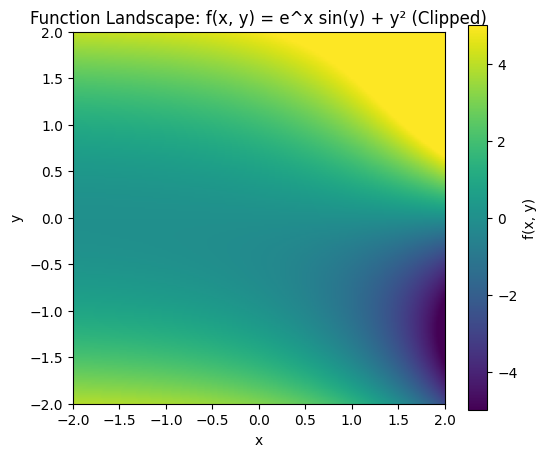

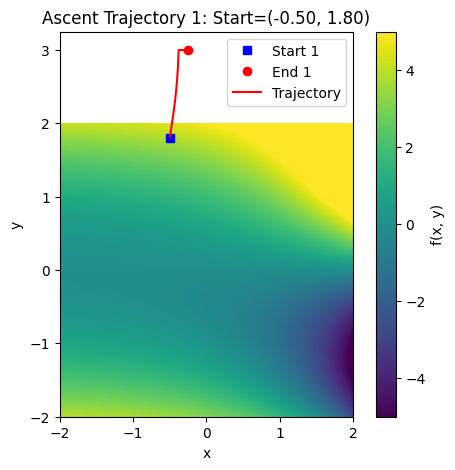

Start 1: Initial = [-0.50183952  1.80285723]
         Final = [-0.25556363  3.        ]
         f(x, y) = 9.109295



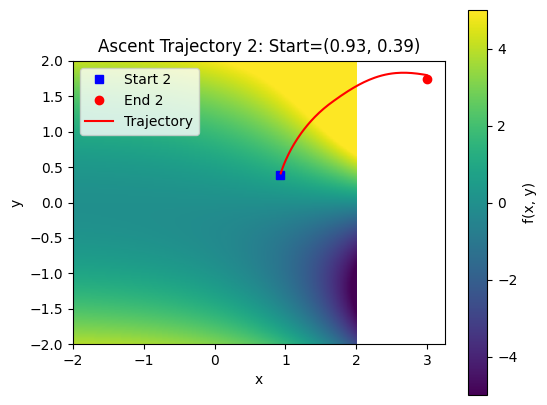

Start 2: Initial = [0.92797577 0.39463394]
         Final = [3.         1.74548907]
         f(x, y) = 22.826567



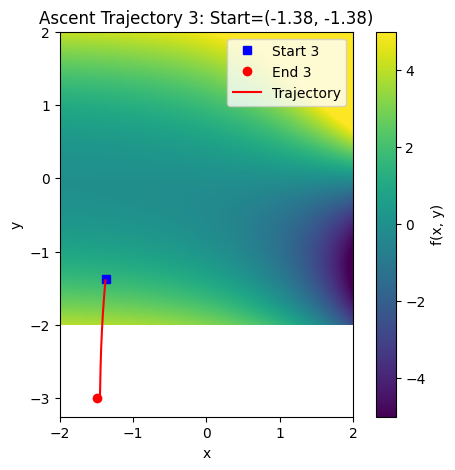

Start 3: Initial = [-1.37592544 -1.37602192]
         Final = [-1.48664163 -3.        ]
         f(x, y) = 8.968088



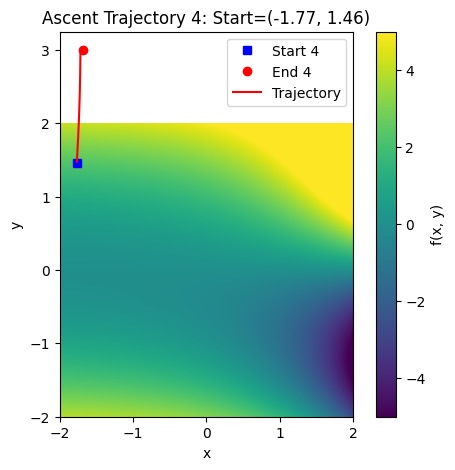

Start 4: Initial = [-1.76766555  1.46470458]
         Final = [-1.68919226  3.        ]
         f(x, y) = 9.026060



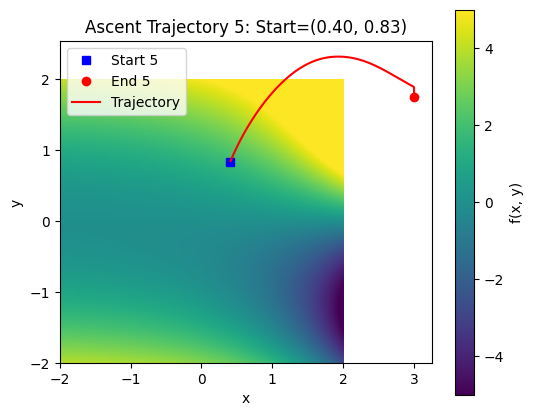

Start 5: Initial = [0.40446005 0.83229031]
         Final = [3.         1.74548944]
         f(x, y) = 22.826567



In [23]:
# ======================================
# Gradient Ascent on f(x, y) = e^x * sin(y) + y^2
# Experiment: Effect of Initial Weights
# ======================================

import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------
# 1. Define the function and its partial derivatives
# --------------------------------------
def f(x, y):
    x, y = np.meshgrid(x, y)
    return np.exp(x) * np.sin(y) + y**2

def dfx(x, y):
    return np.exp(x) * np.sin(y)

def dfy(x, y):
    return np.exp(x) * np.cos(y) + 2*y

# --------------------------------------
# 2. Create the function landscape
# --------------------------------------
x = np.linspace(-2, 2, 201)
y = np.linspace(-2, 2, 201)
Z = f(x, y)
Z_clipped = np.clip(Z, -5, 5)  # Prevent white-out

plt.figure(figsize=(6,5))
plt.imshow(Z_clipped, extent=[x[0], x[-1], y[0], y[-1]],
           origin='lower', cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.title('Function Landscape: f(x, y) = e^x sin(y) + y² (Clipped)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# --------------------------------------
# 3. Gradient Ascent Parameters
# --------------------------------------
learning_rate = 0.005    # constant learning rate
epochs = 300             # constant number of iterations
n_starts = 5             # number of random initializations

# --------------------------------------
# 4. Gradient Ascent with multiple starting points
# --------------------------------------
np.random.seed(42)
start_points = np.random.uniform(-2, 2, size=(n_starts, 2))
final_points = []

for idx, startpnt in enumerate(start_points):
    localmax = startpnt.copy()
    trajectory = np.zeros((epochs, 2))

    for i in range(epochs):
        grad = np.array([
            dfx(localmax[0], localmax[1]),
            dfy(localmax[0], localmax[1])
        ], dtype=np.float64)

        # Clip gradient to prevent overflow
        grad = np.clip(grad, -5, 5)

        # Gradient Ascent update (notice the "+" instead of "-")
        localmax += learning_rate * grad

        # Keep values bounded to avoid e^x overflow
        localmax = np.clip(localmax, -3, 3)
        trajectory[i, :] = localmax

    final_points.append(localmax)

    # --------------------------------------
    # 5. Visualization for each initialization
    # --------------------------------------
    plt.figure(figsize=(6,5))
    plt.imshow(Z_clipped, extent=[x[0], x[-1], y[0], y[-1]],
               origin='lower', cmap='viridis')
    plt.plot(startpnt[0], startpnt[1], 'bs', label=f'Start {idx+1}')
    plt.plot(localmax[0], localmax[1], 'ro', label=f'End {idx+1}')
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-', label='Trajectory')
    plt.title(f'Ascent Trajectory {idx+1}: Start=({startpnt[0]:.2f}, {startpnt[1]:.2f})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.colorbar(label='f(x, y)')
    plt.show()

    print(f"Start {idx+1}: Initial = {startpnt}")
    print(f"         Final = {localmax}")
    print(f"         f(x, y) = {np.exp(localmax[0]) * np.sin(localmax[1]) + localmax[1]**2:.6f}\n")
